##Image Processing in OpenCV

In [84]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [85]:
import numpy as np
import cv2

img = cv2.imread('sunset.jpg',1)

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

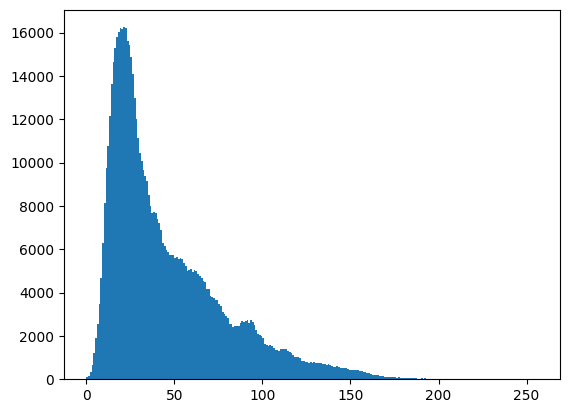

In [86]:

img = cv2.imread('sunset.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.hist(img.ravel(),256,[0,256]) 
plt.show()

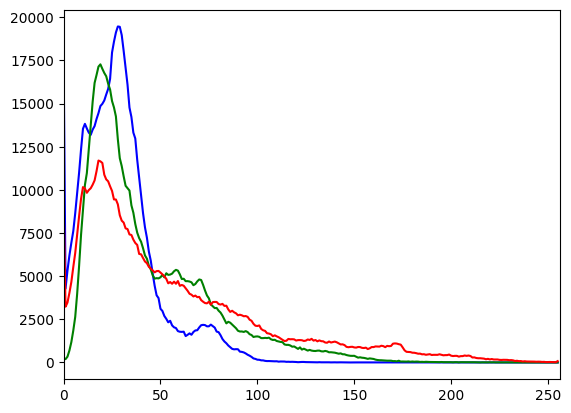

In [87]:
img = cv2.imread('sunset.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

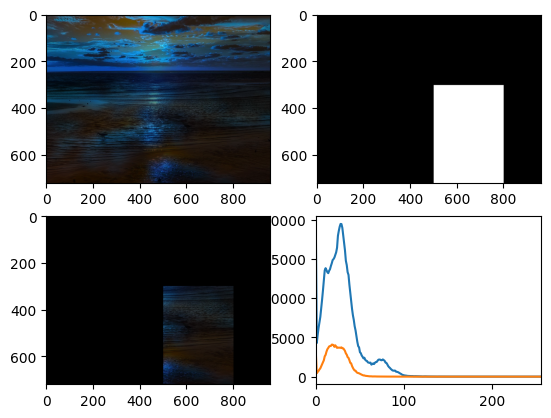

In [88]:
img = cv2.imread('sunset.jpg',1)
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[300:800, 500:800] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
 # Calculate histogram with mask and without mask
 # Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

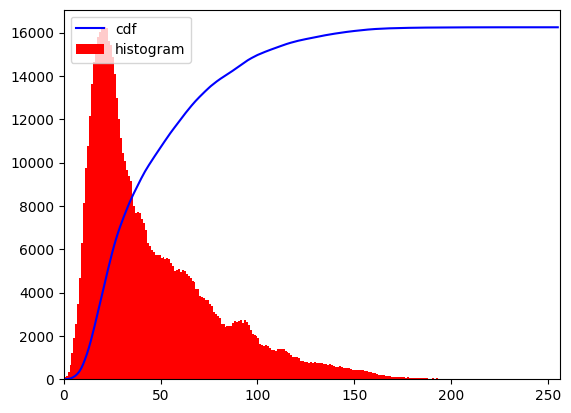

In [89]:
img = cv2.imread('sunset.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


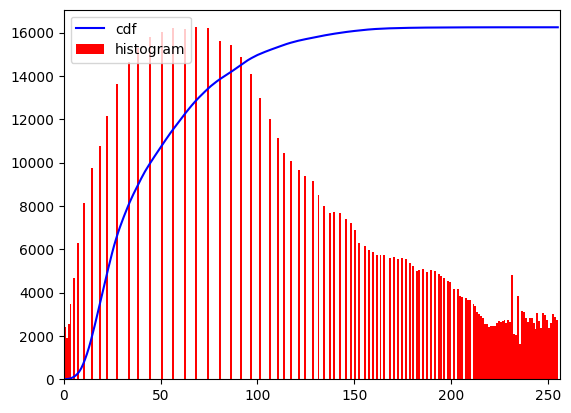

In [90]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m- cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]

plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [91]:
img = cv2.imread('sunset.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)

True

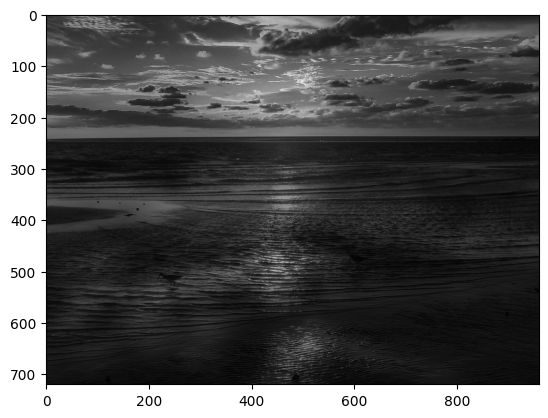

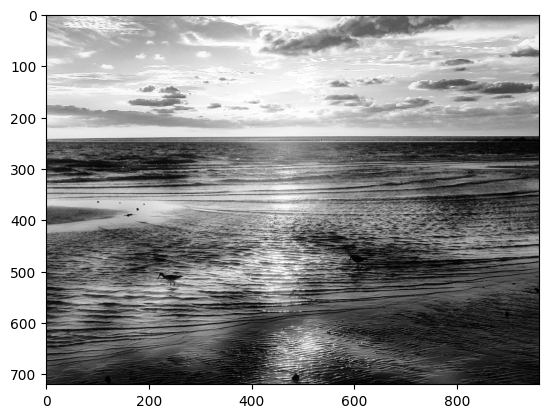

In [93]:
plt.imshow(img,'gray')
plt.show()
plt.imshow(img2,'gray')
plt.show()